In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools
from sklearn.decomposition import PCA

In [2]:
# Read in the data with no header
df1 = pd.read_csv('./data/data2D.csv',header=None)
# colnames = ['V1', 'V2']
colnames = ['V1', 'V2']
df1.columns = colnames
df2 = pd.read_csv('./data/data1000D.csv',header=None)
# colnames = ['V1', ... , 'V1000']
colnames = ['V'+str(i) for i in range(1,1001)]
df2.columns = colnames


Reconstruction error for df1 with 1 component:  0.8869030837347941


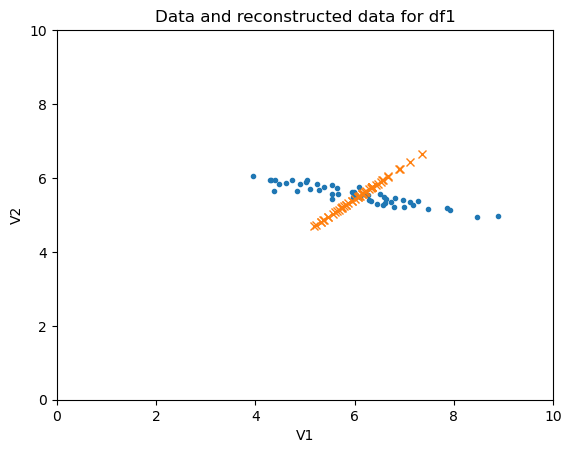

In [3]:
# do svd on df1
U1, s1, V1 = np.linalg.svd(df1, full_matrices=False)
# take the first column of V1
V1 = V1[0,:]
# 4. project the data onto the first principal component
df1_pca = np.dot(df1,V1.T)
# 5. reconstruct the data
df1_recon = np.outer(df1_pca,V1)
# 6. compute the reconstruction error
df1_err = np.sum((df1-df1_recon)**2)
# ave df1_err over all rows
df1_err = np.sum(df1_err) / df1.shape[0]
print('Reconstruction error for df1 with 1 component: ',df1_err)

# plot the data and the reconstructed data, x from 0 to 10, y from 0 to 10
# data is dot, reconstructed is cross
plt.figure()
plt.plot(df1['V1'],df1['V2'],'.')
plt.plot(df1_recon[:,0],df1_recon[:,1],'x')
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Data and reconstructed data for df1')
plt.show()


Reconstruction error for df1_demean with 1 component:  0.010006085628512906


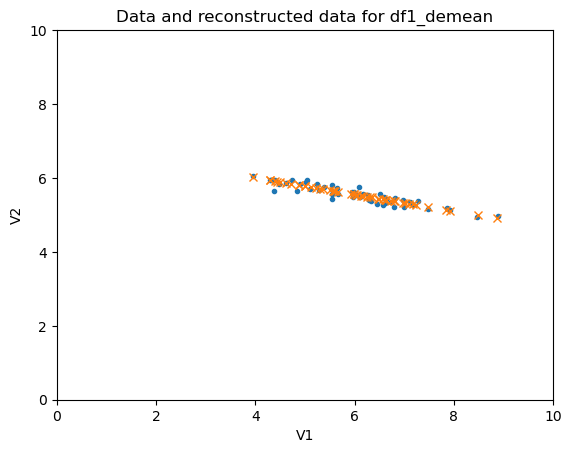

In [4]:
# demean df1 and store the mean
df1_mean = np.mean(df1,axis=0)
df1_demean = df1 - df1_mean
# do svd on df1_demean
U1_demean, s1_demean, V1_demean = np.linalg.svd(df1_demean, full_matrices=False)
# take the first column of V1_demean
V1_demean = V1_demean[0,:]
# 4. project the data onto the first principal component
df1_demean_pca = np.dot(df1_demean,V1_demean)
# 5. reconstruct the data
df1_demean_recon = np.outer(df1_demean_pca,V1_demean)
# add the mean back to the reconstructed data
df1_demean_recon = df1_demean_recon + np.full(df1_demean_recon.shape,df1_mean)
# 6. compute the reconstruction error
df1_demean_err = np.sum((df1_demean_recon-df1)**2)
# ave df1_demean_err over all rows
df1_demean_err = np.sum(df1_demean_err) / df1.shape[0]
print('Reconstruction error for df1_demean with 1 component: ',df1_demean_err)

# plot the data and the reconstructed data, x from 0 to 10, y from 0 to 10
# data is dot, reconstructed is cross
plt.figure()
plt.plot(df1['V1'],df1['V2'],'.')
plt.plot(df1_demean_recon[:,0],df1_demean_recon[:,1],'x')
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Data and reconstructed data for df1_demean')
plt.show()

Reconstruction error for df1_demean_scale with 1 component:  0.049472083454770666


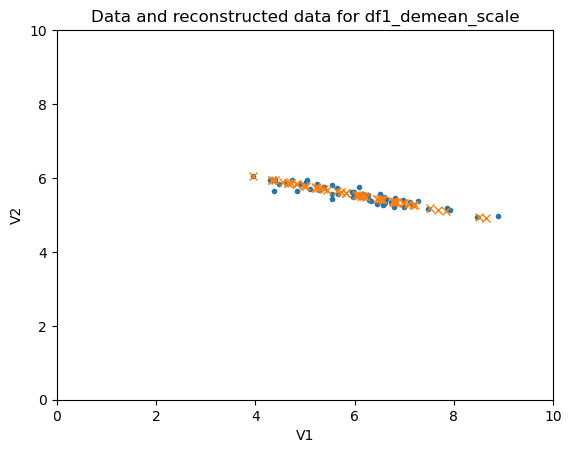

In [5]:
# demean and scale df1 and store the mean and scale
df1_mean = np.mean(df1,axis=0)
df1_std = np.std(df1,axis=0)
df1_demean_scale = (df1 - df1_mean) / df1_std
# do svd on df1_demean_scale
U1_demean_scale, s1_demean_scale, V1_demean_scale = np.linalg.svd(df1_demean_scale, full_matrices=False)
# take the first column of V1_demean_scale
V1_demean_scale = V1_demean_scale[0,:]
# 4. project the data onto the first principal component
df1_demean_scale_pca = np.dot(df1_demean_scale,V1_demean_scale)
# 5. reconstruct the data
df1_demean_scale_recon = np.outer(df1_demean_scale_pca,V1_demean_scale)
# add the mean back to the reconstructed data
df1_demean_scale_recon = df1_demean_scale_recon * np.full(df1_demean_scale_recon.shape,df1_std)
df1_demean_scale_recon = df1_demean_scale_recon + np.full(df1_demean_scale_recon.shape,df1_mean)
# 6. compute the reconstruction error
df1_demean_scale_err = np.sum((df1_demean_scale_recon-df1)**2)
# ave df1_demean_scale_err over all rows
df1_demean_scale_err = np.sum(df1_demean_scale_err) / df1.shape[0]
print('Reconstruction error for df1_demean_scale with 1 component: ',df1_demean_scale_err)

# plot the data and the reconstructed data, x from 0 to 10, y from 0 to 10
# data is dot, reconstructed is cross
plt.figure()
plt.plot(df1['V1'],df1['V2'],'.')
plt.plot(df1_demean_scale_recon[:,0],df1_demean_scale_recon[:,1],'x')
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Data and reconstructed data for df1_demean_scale')
plt.show()

Reconstruction error for df1_demean with 1 component:  0.010006085628512908


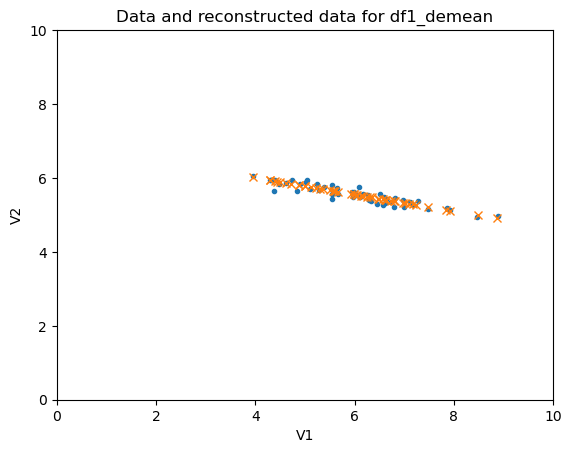

In [6]:
# DRO

# demean df1 and store the mean
df1_mean = np.mean(df1,axis=0)
df1_demean = df1 - df1_mean
# do svd on df1_demean
U1_demean, s1_demean, V1_demean = np.linalg.svd(df1_demean, full_matrices=False)
# take the first columns of U1_demean and times the square root of number of rows
z = U1_demean[:,0:1] * np.sqrt(df1_demean.shape[0])
# take the first columns of V1_demean and times with first singular value and divide by square root of number of rows
A = V1_demean[0:1,:] * s1_demean[0:1] / np.sqrt(df1_demean.shape[0])
# reconstruct the data: x = z * A + mean
df1_demean_recon = np.dot(z,A) + np.full(df1_demean_scale_recon.shape,df1_mean)
# 6. compute the reconstruction error
df1_demean_err = np.sum((df1_demean_recon-df1)**2)
# ave df1_demean_err over all rows
df1_demean_err = np.sum(df1_demean_err) / df1.shape[0]
print('Reconstruction error for df1_demean with 1 component: ',df1_demean_err)

# plot the data and the reconstructed data, x from 0 to 10, y from 0 to 10
# data is dot, reconstructed is cross
plt.figure()
plt.plot(df1['V1'],df1['V2'],'.')
plt.plot(df1_demean_recon[:,0],df1_demean_recon[:,1],'x')
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Data and reconstructed data for df1_demean')
plt.show()

In [7]:
# calculate covariance matrix of df1_demean
cov1 = np.cov(df1_demean.T)
# calculate cov1 - A * A.T
cov1_err = cov1 - np.dot(A.T,A)
# get the mean of the diagonal of cov1_err
cov1_err = np.mean(np.diag(cov1_err))

Reconstruction error for df1_demean with 1 component:  0.010022162187972316


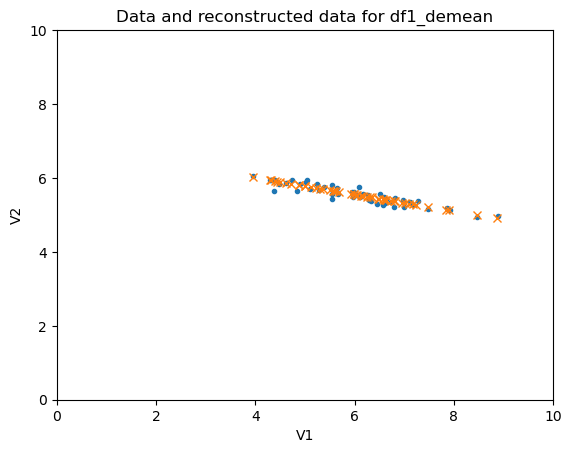

In [8]:
# DRLV

# demean df1 and store the mean
b = np.mean(df1,axis=0)
df1_demean = df1 - df1_mean
A0 = A.T
eta0 = cov1_err
X = df1_demean.T
epoch = 10
for i in range(epoch):
    # calculate beta = A^T (AA^T + eta0 I) ^ -1
    beta = np.dot(A0.T,np.linalg.inv(np.dot(A0,A0.T) + eta0 * np.identity(A0.shape[0])))
    # calculate Ez = beta * X
    Ez = np.dot(beta,X)
    # calculate Ezz^T = I - beta * A + beta * X * X^T * beta
    EzzT = np.identity(beta.shape[0]) - np.dot(beta,A0) + np.dot(np.dot(beta,np.dot(X,X.T)),beta.T)
    # update A = X * Ez^T * Ezz^T ^ -1
    A0 = np.dot(X,np.dot(Ez.T,np.linalg.inv(EzzT)))
    # update eta0 = 1 / (N * D) * trace(X * X^T - A * Ez * X), D is the number of columns of X
    eta0 = 1 / (X.shape[1] * X.shape[0]) * np.trace(np.dot(X,X.T) - np.dot(A0,np.dot(Ez,X.T)))



# reconstruct the data: x = z * A + mean
beta = np.dot(A0.T,np.linalg.inv(np.dot(A0,A0.T) + eta0 * np.identity(A0.shape[0])))
z = np.dot(beta,X)
df1_demean_recon = np.dot(z.T,A0.T) + np.full(df1_demean.shape,b)
# 6. compute the reconstruction error
df1_demean_err = np.sum((df1_demean_recon-df1)**2)
# ave df1_demean_err over all rows
df1_demean_err = np.sum(df1_demean_err) / df1.shape[0]
print('Reconstruction error for df1_demean with 1 component: ',df1_demean_err)

# plot the data and the reconstructed data, x from 0 to 10, y from 0 to 10
# data is dot, reconstructed is cross
plt.figure()
plt.plot(df1['V1'],df1['V2'],'.')
plt.plot(df1_demean_recon[:,0],df1_demean_recon[:,1],'x')
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Data and reconstructed data for df1_demean')
plt.show()

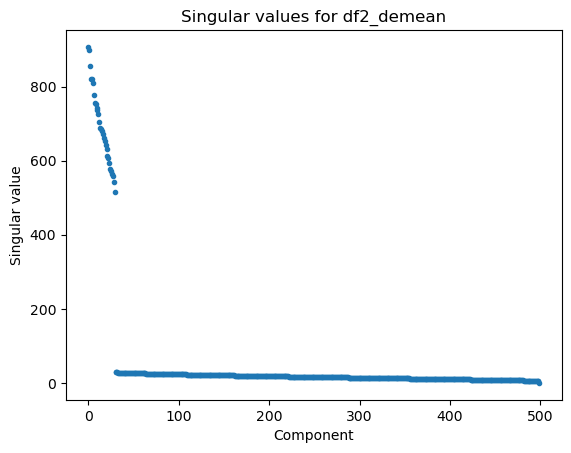

In [9]:
# observe the singular values in df2 and see if there is a clear “knee point” in the spectrum.
# if there is, use it as the number of components to keep. If not, use the number of components
# that can explain 90% of the variance in the data.

# demean df2 and store the mean
df2_mean = np.mean(df2,axis=0)
df2_demean = df2 - df2_mean
# do svd on df2_demean
U2_demean, s2_demean, V2_demean = np.linalg.svd(df2_demean, full_matrices=False)
# plot the singular values
plt.figure()
plt.plot(s2_demean,'.')
plt.xlabel('Component')
plt.ylabel('Singular value')
plt.title('Singular values for df2_demean')
plt.show()

In [10]:
# the number of components to keep is 30
# do svd on df2
U2, s2, V2 = np.linalg.svd(df2, full_matrices=False)
# take the first 30 column of V1
V2 = V2[0:30,:]
# 4. project the data onto the first principal component
df2_pca = np.dot(df2,V2.T)
# 5. reconstruct the data
df2_recon = np.dot(df2_pca,V2)
# 6. compute the reconstruction error
df2_err = np.sum((df2-df2_recon)**2)
# ave df2_err over all rows
df2_err = np.sum(df2_err) / df2.shape[0]
print('Reconstruction error for df2 with 30 components: ',df2_err)

Reconstruction error for df2 with 30 components:  802.7313986203584


In [11]:
# demean df2 and store the mean
df2_mean = np.mean(df2,axis=0)
df2_demean = df2 - df2_mean
# do svd on df2_demean
U2_demean, s2_demean, V2_demean = np.linalg.svd(df2_demean, full_matrices=False)
# take the first 30 column of V2_demean
V2_demean = V2_demean[0:30,:]
# 4. project the data onto the first principal component
df2_demean_pca = np.dot(df2_demean,V2_demean.T)
# 5. reconstruct the data
df2_demean_recon = np.dot(df2_demean_pca,V2_demean)
# add the mean back to the reconstructed data
df2_demean_recon = df2_demean_recon + np.full(df2_demean_recon.shape,df2_mean)
# 6. compute the reconstruction error
df2_demean_err = np.sum((df2_demean_recon-df2)**2)
# ave df2_demean_err over all rows
df2_demean_err = np.sum(df2_demean_err) / df2.shape[0]
print('Reconstruction error for df2_demean with 30 components: ',df2_demean_err)

Reconstruction error for df2_demean with 30 components:  273.0459589786028


In [12]:
# demean and scale df2 and store the mean and scale
df2_mean = np.mean(df2,axis=0)
df2_std = np.std(df2,axis=0)
df2_demean_scale = (df2 - df2_mean) / df2_std
# do svd on df2_demean_scale
U2_demean_scale, s2_demean_scale, V2_demean_scale = np.linalg.svd(df2_demean_scale, full_matrices=False)
# take the first 30 column of V2_demean_scale
V2_demean_scale = V2_demean_scale[0:30,:]
# 4. project the data onto the first principal component
df2_demean_scale_pca = np.dot(df2_demean_scale,V2_demean_scale.T)
# 5. reconstruct the data
df2_demean_scale_recon = np.dot(df2_demean_scale_pca,V2_demean_scale)
# add the mean back to the reconstructed data
df2_demean_scale_recon = df2_demean_scale_recon * np.full(df2_demean_scale_recon.shape,df2_std)
df2_demean_scale_recon = df2_demean_scale_recon + np.full(df2_demean_scale_recon.shape,df2_mean)
# 6. compute the reconstruction error
df2_demean_scale_err = np.sum((df2_demean_scale_recon-df2)**2)
# ave df2_demean_scale_err over all rows
df2_demean_scale_err = np.sum(df2_demean_scale_err) / df2.shape[0]
print('Reconstruction error for df2_demean_scale with 30 components: ',df2_demean_scale_err)

Reconstruction error for df2_demean_scale with 30 components:  273.62858099762326


In [13]:
# DRO

# demean df2 and store the mean
df2_mean = np.mean(df2,axis=0)
df2_demean = df2 - df2_mean
# do svd on df2_demean
U2_demean, s2_demean, V2_demean = np.linalg.svd(df2_demean, full_matrices=False)
# take the first 30 columns of U2_demean and times the square root of number of rows
z = U2_demean[:,0:30] * np.sqrt(df2_demean.shape[0])
# take the first 30 columns of V2_demean and times with first 30 singular value and divide by square root of number of rows
A = np.dot(V2_demean[0:30,:].T,np.diag(s2_demean[0:30])) / np.sqrt(df2_demean.shape[0])
# reconstruct the data: x = z * A + mean
df2_demean_recon = (np.dot(A,z.T) + np.full(df2_demean_scale_recon.shape,df2_mean).T).T
# 6. compute the reconstruction error
df2_demean_err = np.sum((df2_demean_recon-df2)**2)
# ave df2_demean_err over all rows
df2_demean_err = np.sum(df2_demean_err) / df2.shape[0]
print('Reconstruction error for df2_demean with 30 components: ',df2_demean_err)

Reconstruction error for df2_demean with 30 components:  273.0459589786028


In [14]:
# calculate covariance matrix of df2_demean
cov2 = np.cov(df2_demean.T)
# calculate cov2 - A * A.T
cov2_err = cov2 - np.dot(A,A.T)
# get the mean of the diagonal of cov2_err
cov2_err = np.mean(np.diag(cov2_err))

In [15]:
# DRLV

# demean df1 and store the mean
b = np.mean(df2,axis=0)
df2_demean = df2 - b
A0 = A
eta0 = cov2_err
X = df2_demean.T
epoch = 10
for i in range(epoch):
    # calculate beta = A^T (AA^T + eta0 I) ^ -1
    beta = np.dot(A0.T,np.linalg.inv(np.dot(A0,A0.T) + eta0 * np.identity(A0.shape[0])))
    # calculate Ez = beta * X
    Ez = np.dot(beta,X)
    # calculate Ezz^T = I - beta * A + beta * X * X^T * beta
    EzzT = np.identity(beta.shape[0]) - np.dot(beta,A0) + np.dot(np.dot(beta,np.dot(X,X.T)),beta.T)
    # update A = X * Ez^T * Ezz^T ^ -1
    A0 = np.dot(X,np.dot(Ez.T,np.linalg.inv(EzzT)))
    # update eta0 = 1 / (N * D) * trace(X * X^T - A * Ez * X), D is the number of columns of X
    eta0 = 1 / (X.shape[1] * X.shape[0]) * np.trace(np.dot(X,X.T) - np.dot(A0,np.dot(Ez,X.T)))

# reconstruct the data: x = z * A + mean
beta = np.dot(A0.T,np.linalg.inv(np.dot(A0,A0.T) + eta0 * np.identity(A0.shape[0])))
z = np.dot(beta,X)
df2_demean_recon = np.dot(z.T,A0.T) + np.full(df2_demean.shape,b)
# 6. compute the reconstruction error
df2_demean_err = np.sum((df2_demean_recon-df2)**2)
# ave df1_demean_err over all rows
df2_demean_err = np.sum(df2_demean_err) / df2.shape[0]
print('Reconstruction error for df2_demean with 30 component: ',df2_demean_err)

Reconstruction error for df2_demean with 30 component:  273.04842479836793
